In [1]:
#Klein-Model υπόδειγμα με μονοπωλιακή τράπεζα
# Δημήτρης Βολιώτης

## Klein-Model υπόδειγμα με μονοπωλιακή τράπεζα

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing # Το init_printing εισάγει το LaTeX printing
init_printing(use_latex='mathjax') 
import math
from sympy.plotting import plot3d, plot

from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function



In [3]:
#Εισαγωγή βασικών και μεταβλητών και παραμέτρων
rD, rL, r = sp.var('rD,rL,r',real=True); #Επιτόκια rD (καταθέσεων), rL (χορηγήσεων), r (παρέμβασης)
D, L = sp.var('D,L', real=True); #Καταθέσεις (D) και Χορηγήσεις (L)
q = sp.var('q', real=True); # Παράμετρος υποχρεωτικών ρευστών διαθεσίμων
# Αντίστροφη συνάρτηση χορηγήσεων
A, a = sp.var('A,a', real=True); #Παράμετροι αντίστροφης συνάρτησης χορηγήσεων
invrL = A-a*L ;
#Αντίστροφη Συνάρτηση καταθέσεων
B,b = sp.var('B,b', real=True); #Παράμετροι αντίστροφης συνάρτησης καταθέσεων
invrD = B +b*D;
#Συνάρτηση κόστους
d,g =sp.var('d,g', real=True); # Παράμετροι συνάρτησης κόστους
cost1 = (0.5*d)*L**2 + (0.5*g)*D**2

## Γενική Λύση με Κυρτή συνάρτηση Κόστους

In [4]:
#Συνάρτηση κερδών μονοπωλιακής τράπεζας

profit = (invrL -r)*L + ((1-q)*r -invrD)*D -cost1
profit

       2                                     2                    
- 0.5⋅D ⋅g + D⋅(-B - D⋅b + r⋅(1 - q)) - 0.5⋅L ⋅d + L⋅(A - L⋅a - r)

In [5]:
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofit = [sp.diff(profit,x) for x in [D,L]] #Παραγώγιση ως προς το D και το L
derprofit
#derprofit[0]
#derprofit[1]

[-B - 2⋅D⋅b - D⋅g + r⋅(1 - q), A - 2⋅L⋅a - L⋅d - r]

In [6]:
#Λύση εξισώσεων πρώτης τάξης ως  dictionary
equilibrium = sp.solve(derprofit, [D,L], dict=True)
equilibrium

⎡⎧   -B - q⋅r + r       A - r  ⎫⎤
⎢⎨D: ────────────, L: ─────────⎬⎥
⎣⎩    2.0⋅b + g       2.0⋅a + d⎭⎦

In [7]:
# Λύση εξισώσεων πρώτης τάξης ως list
Dstar=sp.solve(derprofit[0], D);
Lstar= sp.solve(derprofit[1],L);
Dstar, Lstar

⎛⎡-B - q⋅r + r⎤  ⎡  A - r  ⎤⎞
⎜⎢────────────⎥, ⎢─────────⎥⎟
⎝⎣ 2.0⋅b + g  ⎦  ⎣2.0⋅a + d⎦⎠

## Προχωρούμε σε μια άσκηση για το υπολογισμό των επιτοκίων στην ισορροπία.

In [8]:
# Αντικατάσταση (επειδή είναι λίστα, χρησιμοποιούμε το πρώτο argument,πχ. Dstar[0])
eqDeposits = Dstar[0].subs([(g,0.005), (q,0.05), (B,0.035), (b,0.5), (r,0.1)])
eqLoans = Lstar[0].subs([ (A,1), (r, 0.1), (a,0.085), (d,0.001)])
eqDeposits, eqLoans

(0.0597014925373134, 5.26315789473684)

In [9]:
# Αντικατάσταση  στις αντίστροφες συναρτήσεις

eq_rL = invrL.subs([(A,0.5), (a,0.085) , (L,eqLoans) ]);
eq_rD = invrD.subs([(B,0.035), (b,0.5), (D,eqDeposits)]);
eq_rL, eq_rD

(0.0526315789473684, 0.0648507462686567)

In [10]:
# Υπολογισμός κέρδους στην ισορροπία

eqProfit = profit.subs([(A,0.5), (a,0.085) , (L,eqLoans),(B,0.035), (b,0.5), (D,eqDeposits), (g,0.005), (d,0.001), (r,0.1),(q,0.05) ]);
eqProfit

-0.261366849960723

## Λύση του προβλήματος με γραμμικό κόστος
$C=dL +gD$

In [11]:
#Ορισμός του γραμμικού κόστους
cost2= d*L + g*D
cost2

D⋅g + L⋅d

In [12]:
#Συνάρτηση κερδών μονοπωλιακής τράπεζας

profit2 = (invrL -r)*L + ((1-q)*r -invrD)*D -cost2
profit2

-D⋅g + D⋅(-B - D⋅b + r⋅(1 - q)) - L⋅d + L⋅(A - L⋅a - r)

In [13]:
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofit2 = [sp.diff(profit2,x) for x in [D,L]] #Παραγώγιση ως προς το D και το L
derprofit2
#derprofit2[0]
#derprofit2[1]

[-B - 2⋅D⋅b - g + r⋅(1 - q), A - 2⋅L⋅a - d - r]

In [14]:
#Λύση εξισώσεων πρώτης τάξης
linequilibrium = sp.solve(derprofit2, [D,L], dict=True)
linequilibrium

⎡⎧   -B - g - q⋅r + r     A - d - r⎫⎤
⎢⎨D: ────────────────, L: ─────────⎬⎥
⎣⎩         2⋅b               2⋅a   ⎭⎦

## Λύση του προβλήματος με μη γραμμικό κόστος
$C=L^2 D^2$

In [15]:
#Ορισμός του μη γραμμικού κόστους
cost3= L**2 * D**2 
cost3

 2  2
D ⋅L 

In [16]:
#Συνάρτηση κερδών μονοπωλιακής τράπεζας

profit3 = (invrL -r)*L + ((1-q)*r -invrD)*D -cost3
profit3

   2  2                                             
- D ⋅L  + D⋅(-B - D⋅b + r⋅(1 - q)) + L⋅(A - L⋅a - r)

In [17]:
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofit3 = [sp.diff(profit3,x) for x in [D,L]] #Παραγώγιση ως προς το D και το L
derprofit3
#derprofit3[0]
#derprofit3[1]

⎡          2                             2              ⎤
⎣-B - 2⋅D⋅L  - 2⋅D⋅b + r⋅(1 - q), A - 2⋅D ⋅L - 2⋅L⋅a - r⎦

$$Αριθμητική Λύση$$

In [18]:
#Διάγραμμα αντίστροφης συνάρτησης ζήτησης χορηγήσεων
expr1 = invrL.subs({A: 1, a:0.05}); #Εισάγουμε τιμές στις αντίστροφες συναρτήσεις ώστε να σχεδιάσουμε τα διαγράμματα
expr2 = invrD.subs({B: 0, b:0.005});
expr3 = cost1.subs({d:0.01, g:0.04});
#pl1 = plot(expr1, (L, 0, 22), show=False);
#pl2 = plot(expr2, (D, 0, 40), show=False);

#pl1.show()
#pl2.show()

In [19]:
#Συνάρτηση κερδών μονοπωλιακής τράπεζας (Με αντικατάσταση)

profit0 = (expr1 -r)*L + ((1-q)*r -expr2)*D -expr3
profit00 = profit0.subs({q:0.1}) #Αντικατάσταση υποχρεωτικών ρευστών διαθεσίμων με 10%
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofit0 = [sp.diff(profit00,x) for x in [D,L]] #Παραγώγιση ως προς το D και το L
derprofit0


[-0.05⋅D + 0.9⋅r, -0.11⋅L - r + 1]


$$Διαγράμματα$$


In [20]:
#Με κυρτό κόστος

In [21]:
init_printing(pretty_print=False);
Dstar, Lstar

([(-B - q*r + r)/(2.0*b + g)], [(A - r)/(2.0*a + d)])

In [22]:
#%pylab inline

C:\Users\dvoliotis\AppData\Local\Temp\ipykernel_17344\3710274273.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


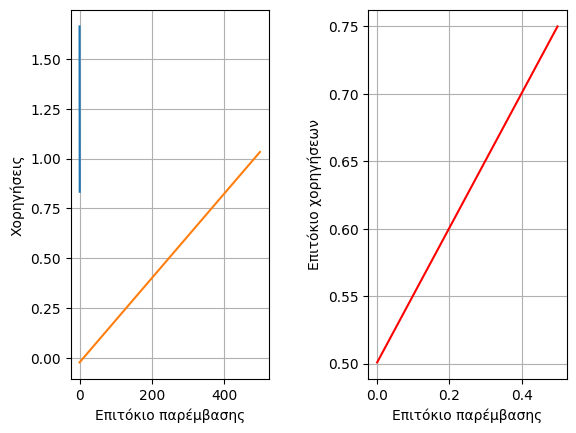

In [23]:
def Dstar(r):
    return (-B - q*r + r)/(2.0*b + g);
def Lstar(r):
    return (A - r)/(2.0*a + d);
def rL(Lstar):
    return A - a*Lstar(r)
def rD(Dstar):
    return B + b*Dstar(r)

A=1
a=0.3
q=0.1
B=0.01
b=0.2
d=0.001
g=0.025
r = np.arange(0,0.5,0.001)

plt.figure()
plt.title('Συγκριτική Στατική')
plt.subplot(1,2,1)
plt.plot(r, Lstar(r), Dstar(r))
plt.grid(True)
plt.xlabel("Επιτόκιο παρέμβασης")
plt.ylabel('Χορηγήσεις')

plt.subplot(1,2,2)
plt.plot(r, rL(Lstar), 'r')
plt.grid(True)
plt.xlabel("Επιτόκιο παρέμβασης")
plt.ylabel('Επιτόκιο χορηγήσεων')
plt.subplots_adjust(wspace=0.5)